In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_fuml_salary_18-19')

In [3]:
tes.dtypes

NAME          object
FUML           int64
FUML_rank    float64
salary         int64
dtype: object

In [4]:
tes.head()

,NAME,FUML,FUML_rank,salary
0,Demetrius Harris,0,25.5,2100000
1,Ryan Griffin,0,25.5,3000000
2,Ryan Griffin,0,25.5,1125000
3,Luke Willson,0,25.5,2500000
4,Gerald Everett,0,25.5,1511117


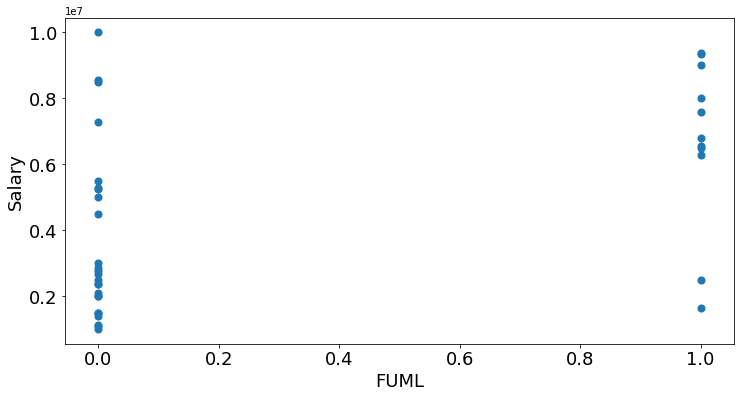

In [5]:
ax = tes.plot(kind="scatter", x = 'FUML',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUML', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['FUML', 'salary']])

In [7]:
X.mean(axis = 0)

array([-8.63506797e-17, -1.11022302e-16])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 1.50755672, -0.88245263],
       [-0.66332496, -0.90240644],
       [ 1.50755672,  1.08560885],
       [-0.66332496,  1.38865087],
       [-0.66332496,  0.17566502]])

In [11]:
km.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 3, 3, 4, 1, 1, 4,
       4, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,FUML,FUML_rank,salary,clusters
0,Demetrius Harris,0,25.5,2100000,1
1,Ryan Griffin,0,25.5,3000000,1
2,Ryan Griffin,0,25.5,1125000,1
3,Luke Willson,0,25.5,2500000,1
4,Gerald Everett,0,25.5,1511117,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.00000000e+00, 2.07649050e+06],
       [0.00000000e+00, 2.01928506e+06],
       [1.00000000e+00, 7.71871111e+06],
       [0.00000000e+00, 8.58750000e+06],
       [0.00000000e+00, 5.11000000e+06]])

In [14]:
tes.groupby('clusters')[['FUML', 'salary']].mean()

,FUML,salary
clusters,,
0,1.0,2.076490e+06
1,0.0,2.019285e+06
2,1.0,7.718711e+06
3,0.0,8.587500e+06
4,0.0,5.110000e+06


In [15]:
centroids = tes.groupby('clusters')[['FUML', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

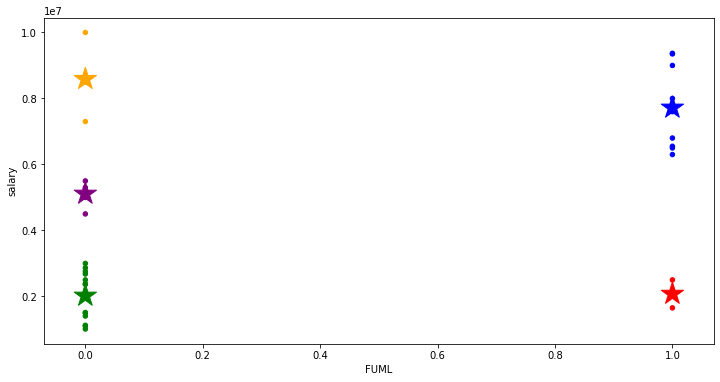

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'FUML', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUML', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

2.9385414222752253

In [18]:
silhouette_score(X, km.labels_)

0.7325848208061987